# One-sample z-test for the mean

The goal of the one-sample $z$-test to check if the mean $\mu$ of an unknown population $X \sim \mathcal{N}(\mu, \sigma_0)$,
equals the mean $\mu_0$ of a theoretical distribution $X_0 \sim \mathcal{N}(\mu_0, \sigma_0)$.
Note we assume that standard deviation of the unknown population $X$ is known
and equal to the standard deviation of the theoretical population $\sigma_0$.
We discussed this hypothesis test in [notebooks/34_analytical_approx.ipynb](../notebooks/34_analytical_approx.ipynb).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Data
One sample of numerical observations $\mathbf{x}=[x_1, x_2, \ldots, x_n]$.

## Modeling assumptions

We model the unknown population as...

and the theoretical distribution is...




We assume the population is normally distributed $\textbf{(NORM)}$,
or the sample is large enough $\textbf{(LARGEn)}$.

We also assume that the variance of the unknown population is known and equal to the variance of the theoretical population under $H_0$
<!-- $\sigma_{X_0}^2$ is known. -->

## Hypotheses

$H_0: \mu = \mu_0$ and $H_A: \mu \neq \mu_0$,
where $\mu$ is the unknown population mean,
$\mu_0$ is the theoretical mean we are comparing to.

## Statistical design

for $n=5$ ...


for $n=20$ ...


## Test statistic

Compute $z = \frac{\overline{\mathbf{x}} - \mu_0}{\sigma_0/\sqrt{n}}$,
where $\overline{\mathbf{x}}$ is the sample mean,
$\mu_0$ is the theoretical population mean,
$\sigma_0$ is the known standard deviation.
% and $n$ is the sample size.

## Sampling distribution

Standard normal distribution $Z \sim \mathcal{N}(0,1)$.

## P-value calculation

In [3]:
from ministats import ztest

%psource ztest

def ztest(sample, mu0, sigma0, alt="two-sided"):
    """
    Z-test to detect mean deviation from known normal population.
    """
    mean = np.mean(sample)
    n = len(sample)
    se = sigma0 / np.sqrt(n)
    obsz = (mean - mu0) / se
    rvZ = norm(0,1)
    pval = tailprobs(rvZ, obsz, alt=alt)
    return pval


To perform the one-sample $z$-test on the sample `xs`,
we call `ztest(xs, mu0=..., sigma0=...)`,
with the `...`s replaced by the mean and standard deviation parameters of the distribution under $H_0$.

## Examples

For all the examples we present below,
we assume the theoretical distribution we expect under the null hypothesis,
is normally distributed with mean $\mu_{X_0}=100$
and standard deviation $\sigma_{X_0} =  5$:

$$
    \texttt{rvX0} = X_0 \sim \mathcal{N}(100,5).
$$



In [4]:
from scipy.stats import norm
muX0 = 100
sigmaX0 = 5
rvX0 = norm(muX0, sigmaX0)

### Example A: population different from $H_0$

Suppose the unknown population is normally distributed 
with mean $\mu_{X_A}=104$
and standard deviation $\sigma_{X_A} = 3$:

$$
    \texttt{rvXA} = X_A \sim \mathcal{N}(110,3).
$$

In [5]:
muXA = 104
sigmaXA = 3
rvXA = norm(muXA, sigmaXA)

Let's generate a sample `xAs` of size $n=20$ from the random variable $X = \texttt{rvXA}$.

In [6]:
np.random.seed(42)

# generate a random sample of size n=20
n = 20
xAs = rvXA.rvs(n)
xAs

array([105.49014246, 103.5852071 , 105.94306561, 108.56908957,
       103.29753988, 103.29758913, 108.73763845, 106.30230419,
       102.59157684, 105.62768013, 102.60974692, 102.60281074,
       104.72588681,  98.26015927,  98.8252465 , 102.31313741,
       100.96150664, 104.942742  , 101.27592777,  99.7630889 ])

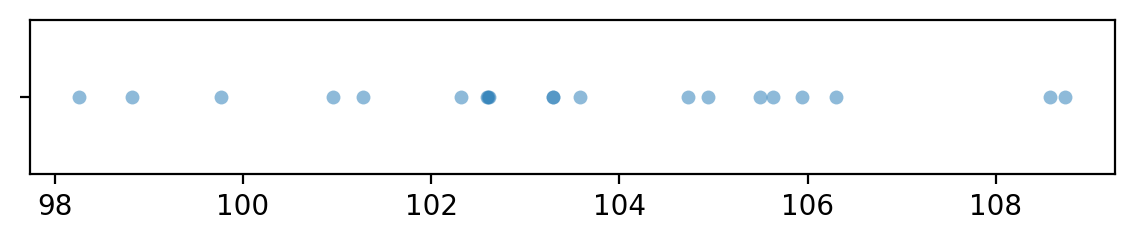

In [7]:
import seaborn as sns
with plt.rc_context({"figure.figsize":(7,1)}):
    sns.stripplot(x=xAs, jitter=0, alpha=0.5)

To obtain the $p$-value,
we first compute the observed $z$-statistic,
then calculate the tail probabilities in the two tails of the standard normal distribution $Z\sim\mathcal{N}(0,1)$.

In [8]:
obsmean = np.mean(xAs)
se = sigmaX0 / np.sqrt(n)
obsz = (obsmean - muX0) / se
rvZ = norm(0,1)
pvalue = rvZ.cdf(-obsz) + 1-rvZ.cdf(obsz)
obsz, pvalue

(3.1180664906014357, 0.0018204172963375287)

The helper function `ztest` in the `ministats` module performs
exactly the same sequence of steps to compute the $p$-value.

In [9]:
from ministats import ztest
ztest(xAs, mu0=muX0, sigma0=sigmaX0)

0.0018204172963375855

The $p$-value we obtain is 0.0018 (0.18%),
which is below the cutoff value $\alpha=0.05$,
so our conclusion is **we reject the null hypothesis**:
the mean of the sample `xAs` is not statistically significantly different from the theoretically expected mean $\mu_{X_0} = 100$.

### Example B: sample from a population as expected under $H_0$

In [10]:
# unknown population X = X0
rvXB = norm(muX0, sigmaX0)

Let's generate a sample `xBs` of size $n=20$ from the random variable $X = \texttt{rvX}$,
which has the same distribution as the theoretical distribution we expect under the null hypothesis.

In [11]:
# np.random.seed(32)  produces false positie
np.random.seed(31)

# generate a random sample of size n=20
n = 20
xBs = rvXB.rvs(n)
xBs

array([ 97.92621393,  98.33315666, 100.40545993,  96.04486524,
        98.90700164,  96.18401578,  96.11439878, 109.24678261,
        96.47199845,  99.56978983, 101.43966651,  99.34306739,
        95.08627924,  95.40604357, 105.99717245,  98.29312879,
        91.20696344, 100.25558735,  97.14035504,  96.49716979])

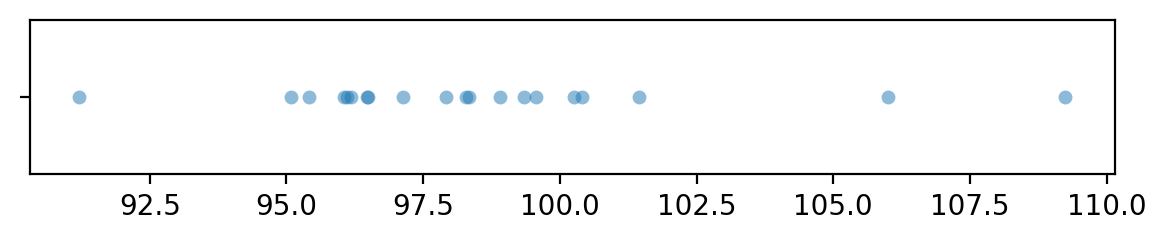

In [12]:
import seaborn as sns
with plt.rc_context({"figure.figsize":(7,1)}):
    sns.stripplot(x=xBs, jitter=0, alpha=0.5)

In [13]:
from ministats import ztest
ztest(xBs, mu0=muX0, sigma0=sigmaX0)

0.17782115942197962

The $p$-value we obtain is 0.18, which is above the cutoff value $\alpha=0.05$
so our conclusion is that we've **failed to reject the null hypothesis**:
the mean of the sample `xBs` is not significantly different from the theoretically expected mean $\mu_{X_0} = 100$.

## Effect size estimates

## Related

- Use the [one-sample $t$-test](./one_sample_t-test.ipynb) if you want to use the sample standard deviation
- Identical calculations to the one-saple $z$-test for proportions

## Discussion

## Links

## CUT MATERIAL

In [14]:
# NOT GOOD: because we can't specify sigma0 manually;
#           the statsmodels function uses sample std instead of sigmaX0
# from statsmodels.stats import weightstats
# weightstats.ztest(x1, x2=None, value=0)